In [54]:
import geopandas as geopd
import rasterio

import matplotlib.pyplot as plt

from rasterio.plot import show
from matplotlib.colors import ListedColormap
from rasterio.windows import from_bounds

In [28]:
grid_path = "/home/iiro/Documents/Koulutyöt/Gradu/data/grids/muutokset.gpkg"
prediction_path = "/home/iiro/Documents/Koulutyöt/Gradu/data/predictions/uusi_ennuste.tif"
grid = geopd.read_file(grid_path, layer='muutosruudukko')

<Axes: >

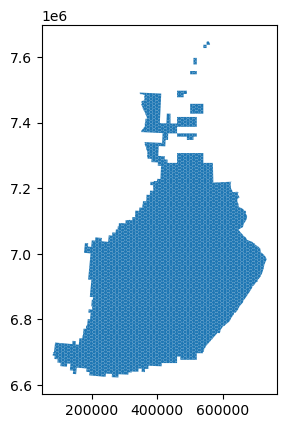

In [29]:
grid.plot()

In [60]:
for row in grid.iterrows():
    if row[0] != 500:
        continue
    geom = row[1].geometry
    W, S, E, N = geom.bounds
    
    with rasterio.open(prediction_path) as src:
        window=from_bounds(left=W, bottom=S, right=E, top=N, transform=src.transform)
        prediction = src.read((1), boundless=True, window=window)
        transform = src.transform
        
    break

<Axes: >

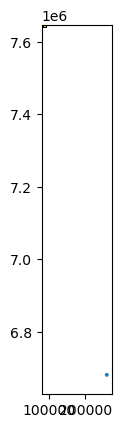

In [61]:
label_cmap=ListedColormap(['black', 'gold', 'darkcyan', 'paleturquoise', 'black'])
fig, ax1 = plt.subplots()
show(prediction, ax=ax1, vmin=0, vmax=4, cmap=label_cmap, interpolation='none', transform=transform)
geopd.GeoSeries(geom).plot(ax=ax1)

In [62]:
print(W,S,E,N)

253630.14115688775 6676806.4868 265177.14654068026 6686806.4868


TypeError: float() argument must be a string or a real number, not 'MultiPolygon'

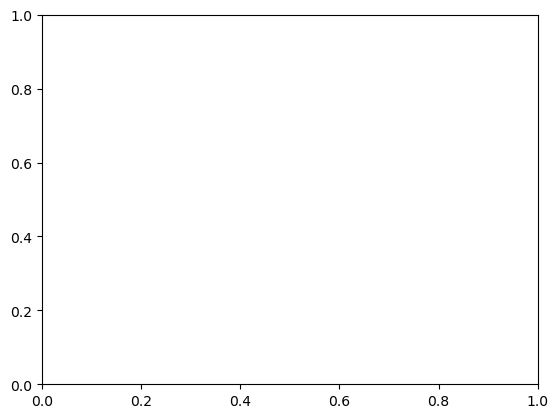